In [32]:
# Aanpassing van de configuratie van Jupyter Notebook
%config IPCompleter.greedy = True
%matplotlib inline

# Importeren van de benodigde bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Source pad van de dataset definiëren
orderData_source = 'Data/knipidee-2024-jan_feb_ma.csv'

# Dataset ophalen
orderData=pd.read_csv(orderData_source)

# Preview weergave van de eerste 5 rijen van de dataset
print('-----Preview van de dataset-----')
print(orderData.head())
print('-----Informatie over de dataset-----')
print(orderData.info())

-----Preview van de dataset-----
   order_number               order_date  customer_number  \
0         27572  2024-02-14 12:25:08.182             3091   
1         27718  2024-02-20 10:23:26.639            11825   
2         27718  2024-02-20 10:23:26.639            11825   
3         27718  2024-02-20 10:23:26.639            11825   
4         27718  2024-02-20 10:23:26.639            11825   

            customer_email     address_street address_zipcode address_city  \
0     info@ita-textiles.dk  Tordenskjoldsgade            1055   COPENHAGEN   
1  atelierulalma@gmail.com           bradului          410103       Oradea   
2  atelierulalma@gmail.com           bradului          410103       Oradea   
3  atelierulalma@gmail.com           bradului          410103       Oradea   
4  atelierulalma@gmail.com           bradului          410103       Oradea   

  address_country_name                  product_name  product_quantity  \
0                   DK                   0307 Selena     

In [34]:
orderData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_number,20139.0,27751.781270,613.775313,26632.0,27222.0,27751.00,28414.50,28725.0
customer_number,20139.0,10919.412732,9366.594462,133.0,1953.0,7652.00,20885.00,25207.0
product_quantity,20139.0,1.107751,0.521091,1.0,1.0,1.00,1.00,20.0
product_unit_price,20139.0,86.791752,212.700681,0.0,23.4,54.00,75.24,8250.0
product_total_price,20139.0,97.911888,231.991080,0.0,23.6,56.25,83.88,8250.0


In [35]:
# Groeperen op ordernummer en betaling per order berekenen
payment_per_order = orderData.groupby('order_number')['product_total_price'].sum().reset_index()

# Resultaat bekijken
print(payment_per_order)

      order_number  product_total_price
0            26632                45.00
1            26633               974.35
2            26634               131.76
3            26635               165.00
4            26636              1312.80
...            ...                  ...
2071         28721              1032.00
2072         28722               699.00
2073         28723               302.13
2074         28724               102.00
2075         28725               165.60

[2076 rows x 2 columns]


-----Correlatiematrix op basis van numerieke kolommen-----
                     order_number  customer_number  product_quantity  \
order_number             1.000000         0.242262         -0.009933   
customer_number          0.242262         1.000000          0.037299   
product_quantity        -0.009933         0.037299          1.000000   
product_unit_price      -0.006508        -0.037740          0.015954   
product_total_price     -0.013938        -0.028534          0.283255   

                     product_unit_price  product_total_price  
order_number                  -0.006508            -0.013938  
customer_number               -0.037740            -0.028534  
product_quantity               0.015954             0.283255  
product_unit_price             1.000000             0.938471  
product_total_price            0.938471             1.000000  


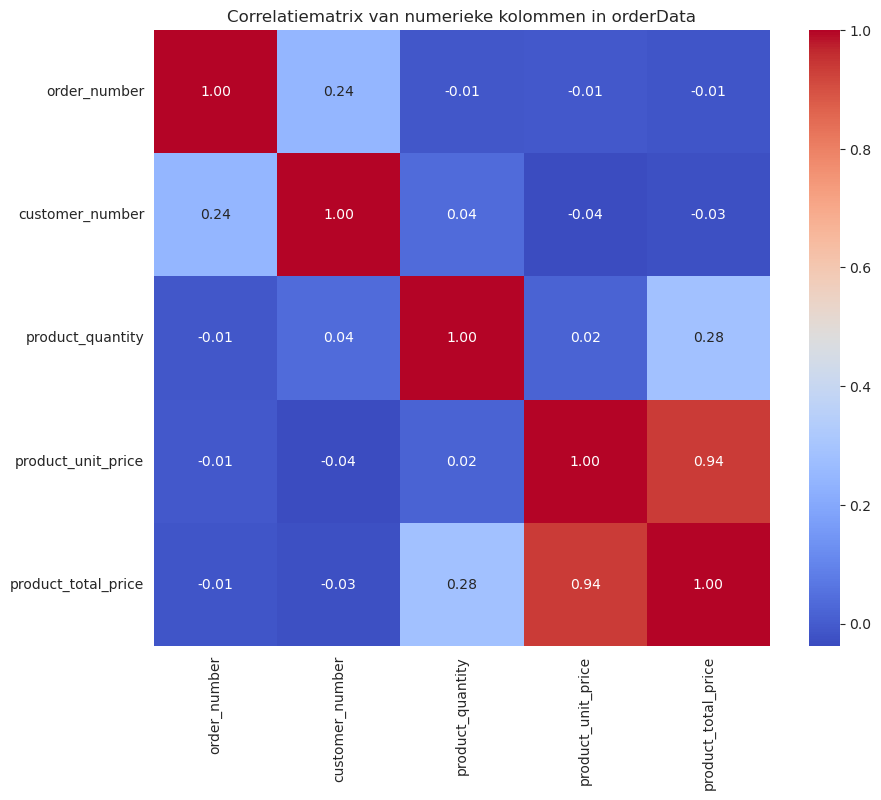

In [38]:
# Alleen numerieke kolommen selecteren
numeric_columns = orderData.select_dtypes(include=['number'])

# Correlatiematrix berekenen op basis van numerieke kolommen
corr_matrix = numeric_columns.corr()

# Correlatiematrix weergeven
print("-----Correlatiematrix op basis van numerieke kolommen-----")
print(corr_matrix)

# Visuele heatmap van de correlatiematrix maken
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlatiematrix van numerieke kolommen in orderData")
plt.show()